# MAD4401 - Project 2

---

## Problem 1

### (a) Complete the table

In [24]:
"""
EulersMethod(f, a, b, N, α) - implementation of Euler's method 
for finding approximate solutions for initial value problems.
Arguments:
    - f = a function object representing first derivative
    - a = inf of f
    - b = sup of f
    - N = number of mesh points (doesn't include initial point)
    - α = the initial value given (may need to be float)
"""
function EulersMethod(f, a, b, N, α)
    # Set up conidtions to and output the initial values
    h = (b-a)/N    # step size 
    t = a    # set first mesh point to first point in interval 
    w = α    # set the initial value for w0
#    println("w0 = ", α)    # simply print initial value 
    vals = [w]    # vector to return approximations
    
    # compute approximations for remaining mesh points
    for i in 1:N
        w = w + h*f(t,w)    # compute w_i
        t = a + i*h    # compute t_i
#        println("w", i, " = ", w)
        # instead of printing the values of w, add them to a vector and return that instead
        append!(vals, w)
    end #for
    return vals
end;

In [25]:
# implementation of first derivative
function f(t,y)
    (t^-2)*(sin(2t)-2t*y)
end;

In [26]:
# compute approximations 
approximationsEM = EulersMethod(f, 1, 2, 4, 2.);

In [28]:
approximationsEM

5-element Vector{Float64}:
 2.0
 1.2273243567064205
 0.8321501570804852
 0.5704467722825309
 0.37882661467612455

### (b) Plot the approximation

In [29]:
using Plots

In [30]:
# exact function 
function g(t)
    (1/2)*(t^-2)*(4+cos(2)-cos(2t))
end;

In [31]:
# compute exact values 
exactEM = g.(collect(1:.25:2));

In [32]:
exactEM

5-element Vector{Float64}:
 2.0
 1.4031989692799334
 1.0164101466785118
 0.7380097715499842
 0.5296870980395587

<br>Below is the graph comparing the exact value to the approximated values.

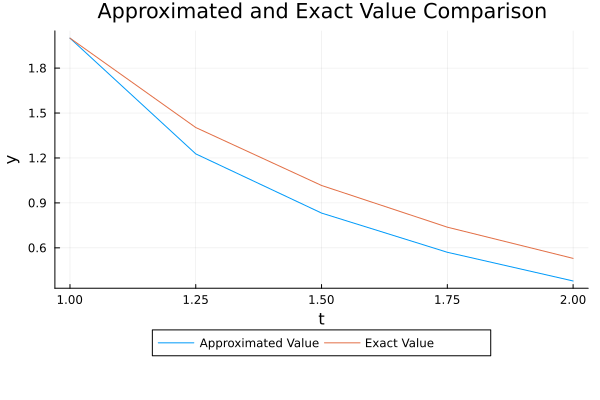

In [131]:
x = collect(1:.25:2)
y1 = approximationsEM
y2 = exactEM
plot(x,[approximationsEM,exactEM], label=["Approximated Value" "Exact Value"])
plot!(legend=:outerbottom, legendcolumns=2)
xlabel!("t")
ylabel!("y")
title!("Approximated and Exact Value Comparison")

### (c)

In [34]:
# compute exact values for given y(2)
exactValEM = g(2)

0.5296870980395587

In [35]:
# compute approximated values at each given N
approximationsN = [];
i = 2
while i <= 32
    vec = EulersMethod(f,1,2,i,2.)
    append!(approximationsN, vec[end]) # only take the last approximation
    i = i*2
end

In [37]:
# computed approximations at each N
approximationsN

5-element Vector{Any}:
 0.18290957292869525
 0.37882661467612455
 0.45878660562608714
 0.495261988720689
 0.5127188700310937

In [38]:
# compute errors
errorsN = []
for j in 1:5
    append!(errorsN,(abs.(approximationsN[j]-exactValEM)))
end

In [40]:
errorsN

5-element Vector{Any}:
 0.34677752511086346
 0.15086048336343416
 0.07090049241347157
 0.03442510931886972
 0.01696822800846498

### (d) Use the loglog in Matlab to plot and verity the error is converging at the rate O(h).

In [41]:
using Plots

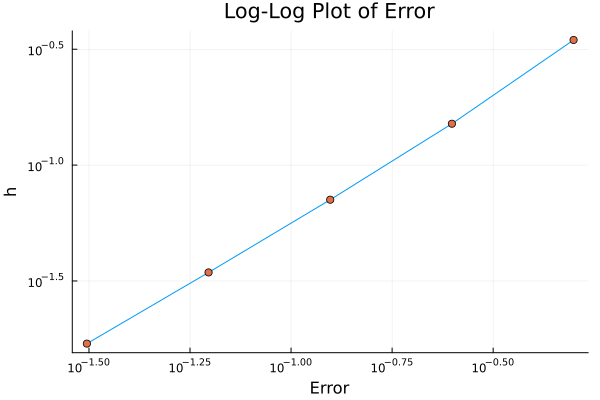

In [129]:
# generate a log-log plot of the errors
plot(h,errorsN)
plot!(xscale=:log10, yscale=:log10, minorgrid=true)
plot!(h, errorsN, seriestype=:scatter, legend=false)
xaxis!("Error")
yaxis!("h")
title!("Log-Log Plot of Error")

---

## Problem 2

### (a) Approximate y(t) using the Runge-Kutta order 4 method with h = 1/4.

In [44]:
"""
RungeKutta4(f, a, b, N, α) - TODO Fill in the deets
"""
function RungeKutta4(f, a, b, N, α)
    h = (b-a)/ N
    t = a
    w = α
    vals = [w]   
    
    for i in 1:N
        k1 = h * f(t,w)
        k2 = h * f(t+(h/2), w + (k1/2))
        k3 = h * f(t+(h/2), w + (k2/2))
        k4 = h * f(t+h, w + k3)
        w = w + ((k1+2k2+2k3+k4)/6)
        append!(vals, w)
        t = a + i*h
    end
    return vals
end;

In [45]:
approximationsRK = RungeKutta4(f, 1, 2, 4, 2.)

5-element Vector{Float64}:
 2.0
 1.403356615429061
 1.0165585859136061
 0.7381316836791276
 0.5297855647836995

### (b) Plot the approximations

In [46]:
exactRK = g.(collect(1:.25:2));

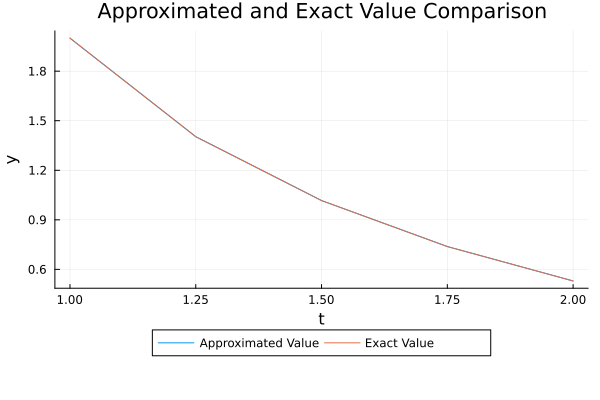

In [133]:
x = collect(1:.25:2)
y1 = approximationsRK
y2 = exactRK
plot(x,[approximationsRK, exactRK], label=["Approximated Value" "Exact Value"])
plot!(legend=:outerbottom, legendcolumns=2)
xlabel!("t")
ylabel!("y")
title!("Approximated and Exact Value Comparison")

### (c) Approximate y(t) using the Runge-Kutta order 4 method with the same values of h as in part 1

In [48]:
# compute exact values for given y(2)
exactValRK = g(2)

0.5296870980395587

In [49]:
# compute approximated values at each given N
approximationsRKN = [];
i = 2
while i <= 32
    vec = RungeKutta4(f,1,2,i,2.)
    append!(approximationsRKN, vec[end]) # only take the last approximation
    i = i*2
end

In [50]:
# computed approximations at each N
approximationsRKN

5-element Vector{Any}:
 0.5315587749650665
 0.5297855647836995
 0.5296925824351879
 0.5296874192459855
 0.5296871174398682

In [51]:
# compute errors
errorsRKN = []
for j in 1:5
    append!(errorsRKN,(abs.(approximationsRKN[j]-exactValRK)))
end

In [53]:
# output computed absolute errors
errorsRKN

5-element Vector{Any}:
 0.0018716769255078258
 9.846674414082379e-5
 5.484395629196115e-6
 3.212064267898995e-7
 1.9400309470007926e-8

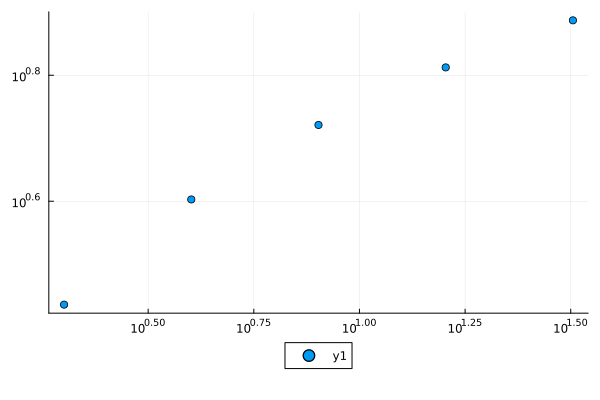

In [61]:
x = [2,4,8,16,32]
logErrsRK = abs.(log10.(errorsRKN))
#scatter(log10.(x), logErrsRK)
scatter(x, logErrsRK)
scatter!(xscale=:log10, yscale=:log10)
scatter!(legend=:outerbottom)